TESTING CONVERT FUNCTIONS FOR PHOIBOS 150 DATA, COMPARISON WITH THE IGOR DATA


USES THE FOLDER dataEPFL/R1932

the folder contains all the igor output arrays for comparison



In [39]:
# This uses the autoreload function form ipynb, useful to reload modificaiton of the source code
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
from specsanalyzer import SpecsAnalyzer
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
spa = SpecsAnalyzer()

import os
testdatapath='../tests/data/dataEPFL/R9132/'
filelist=os.listdir(testdatapath)
print("Data path= ",testdatapath)
#this folders contains the AVG folder with the data, an info.txt vector and a scan vector

Data path=  ../tests/data/dataEPFL/R9132/


The shape of the raw data is:  (256, 344)


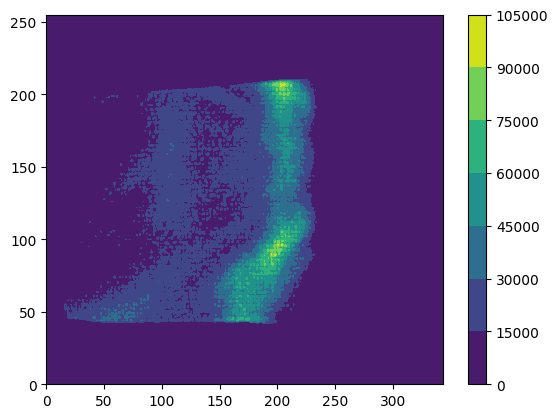

In [41]:
# get the raw image name from the list
rawimagelist= [i for i in filelist if "RAWDATA" in i ]
raw_image_name=os.path.join(testdatapath,rawimagelist[0]) 


with open(raw_image_name) as file:
    tsv_data = np.loadtxt(file, delimiter='\t')
plt.figure()
h = plt.contourf(tsv_data)
plt.colorbar()
print("The shape of the raw data is: ",tsv_data.shape)
#plt.xlim(120,150)
#plt.ylim(150,200)


In [42]:
from specsanalyzer import SpecsAnalyzer
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
spa = SpecsAnalyzer()
scanparameters=spa.config

In [43]:
#load the module and import functions for reading the parameter table from the calib2d file
import specsanalyzer.convert
#let's get all the functions to be tested
from specsanalyzer.convert import get_damatrix_fromcalib2d
from specsanalyzer.convert import get_rr_da
from specsanalyzer.convert import calculate_polynomial_coef_da
from specsanalyzer.convert import mcp_position_mm


In [44]:
from specsanalyzer import SpecsAnalyzer
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

# call an instance of the class 
spa = SpecsAnalyzer()
# io function used to get the calib 2d file in the class
calib2d_dictionary=specsanalyzer.io.parse_calib2d_to_dict('../specsanalyzer/config/phoibos150.calib2d')
#calib2d_dictionary=specsanalyzer.io.parse_calib2d_to_dict('./config/phoibos150.calib2d')

# settings function used to get  configuration files  
config_file=specsanalyzer.settings.parse_config(calib2d_dictionary)



#get the das  and the rr vector 
#rr_array, da_matrix=  specsanalyzer.convert.get_rr_da("WideAngleMode", config_file)

In [45]:
# Load the IGOR txt Di_coeff values for comparison
igordatapath='../tests/data/dataEPFL/R9132'
igordatapath_content=os.listdir(igordatapath)

# get the fitted coefficients
Di_coef_list= [i for i in igordatapath_content if "_coef" in i ]

igor_D_coef_list=[]
for i,name in enumerate(Di_coef_list):
    tmp_name=os.path.join(igordatapath,name) 
    with open(tmp_name) as file:
        #check the name in row 1
        #first_line=file.readline()
        #print(first_line)

        # igor_D_coef_list.append(np.loadtxt(file, delimiter='\t', skiprows=1) )
        igor_D_coef_list.append(np.loadtxt(file, delimiter='\t') )
#igor_D_coef_matrix=np.vstack(igor_D_coef_list)
igor_D_coef_matrix=np.flip(np.vstack(igor_D_coef_list),axis=1)
print(igor_D_coef_matrix)  #row 0 D1 , row 1 D3, ...
print(np.vstack(igor_D_coef_list))


[[-4.4857240e-03  3.2542211e-01 -5.1406364e+00]
 [ 2.5193503e-03 -1.3771337e-01  1.7925767e+00]
 [-7.4261258e-04  2.9766740e-02 -1.8274546e-01]
 [-5.1501684e-05  9.3138171e-03 -2.5310904e-01]]
[[-5.1406364e+00  3.2542211e-01 -4.4857240e-03]
 [ 1.7925767e+00 -1.3771337e-01  2.5193503e-03]
 [-1.8274546e-01  2.9766740e-02 -7.4261258e-04]
 [-2.5310904e-01  9.3138171e-03 -5.1501684e-05]]


In [46]:
# Load the IGOR txt Da_values for comparison
igordatapath='../tests/data/dataEPFL/R9132'
igordatapath_content=os.listdir(igordatapath)

# get the fitted coefficients
Di_value_list= [i for i in igordatapath_content if "_value.tsv" in i ]

igor_D_value_list=[]
for i,name in enumerate(Di_value_list):
    tmp_name=os.path.join(igordatapath,name) 
    with open(tmp_name) as file:
        #check the name in row 1
        #first_line=file.readline()
        #print(first_line)

        #igor_D_value_list.append(np.loadtxt(file, delimiter='\t', skiprows=1) )
        igor_D_value_list.append(np.loadtxt(file, delimiter='\t') )

igor_D_value_matrix=np.vstack(igor_D_value_list)



In [47]:
# let's calculate the corresponding quantities in Pytohn

#load the module and import functions for reading the parameter table from the calib2d file
import specsanalyzer.convert

#let's get all the functions to be tested
from specsanalyzer.convert import get_damatrix_fromcalib2d
from specsanalyzer.convert import get_rr_da
from specsanalyzer.convert import calculate_polynomial_coef_da
from specsanalyzer.convert import mcp_position_mm
from specsanalyzer.convert import calculate_matrix_correction


spa = SpecsAnalyzer(config="../tests/data/dataEPFL/config/config.yaml")
config_dict=spa.config
lens_mode="WideAngleMode"
kinetic_energy=35.000000
pass_energy=35.000000
work_function=4.3
binning=4

eshift = np.array(config_dict[
        "calib2d_dict"
    ]["eShift"])

aInner, damatrix = get_damatrix_fromcalib2d(
    lens_mode,
    kinetic_energy,
    pass_energy,
    work_function,
    config_dict,
    )

dapolymatrix = calculate_polynomial_coef_da(
    damatrix,
    kinetic_energy,
    pass_energy,
    eshift)


# note that for scan 9132 (and 9131) we have   retardatio ratio=   0.88 -> this is wrong imo, checke the effect of the work function
#  rr_inf =   10  rr_factor =   0.75 in igor




In [48]:
print("das")
print(damatrix)
print(igor_D_value_matrix)
print("Difference in the interpolated D coeffiecients")
print(damatrix-igor_D_value_matrix)
# at the moment they differ by some %.. 

print("coefs")
print(dapolymatrix)
print(igor_D_coef_matrix)
print("Difference in the fitted polynomial coeffiecients")
print(dapolymatrix-igor_D_coef_matrix)
# at the moment they differ by some %.. 


das
[[ 7.19828571e-01  7.53542857e-01  7.59685714e-01]
 [-1.36678571e-03  5.85771429e-02  1.34014286e-01]
 [-1.37997143e-02 -5.04428571e-02 -9.16571429e-02]
 [-4.20521429e-04  9.74571429e-03  1.95942857e-02]]
[[ 7.2039998e-01  7.5412500e-01  7.6037496e-01]
 [-1.0939732e-03  5.8812503e-02  1.3415000e-01]
 [-1.4006001e-02 -5.0609998e-02 -9.1762498e-02]
 [-3.6294712e-04  9.7850002e-03  1.9617500e-02]]
Difference in the interpolated D coeffiecients
[[-5.71408571e-04 -5.82142857e-04 -6.89245714e-04]
 [-2.72812514e-04 -2.35360143e-04 -1.35714286e-04]
 [ 2.06286714e-04  1.67140857e-04  1.05355143e-04]
 [-5.75743086e-05 -3.92859143e-05 -2.32142857e-05]]
coefs
[[-4.50145773e-03  3.26489796e-01 -5.15931429e+00]
 [ 2.52950437e-03 -1.38385000e-01  1.80340929e+00]
 [-7.46309038e-04  2.99966531e-02 -1.86097143e-01]
 [-5.18635569e-05  9.34896531e-03 -2.53935214e-01]]
[[-4.4857240e-03  3.2542211e-01 -5.1406364e+00]
 [ 2.5193503e-03 -1.3771337e-01  1.7925767e+00]
 [-7.4261258e-04  2.9766740e-02 -1.8274

In [49]:
# get the rr and the damatrix
rr, damatrix= get_rr_da("WideAngleMode",config_dict)


The shape of the jacobian_reference is:  (256, 344)
The shape of the jacobian_determinant is:  (256, 344)


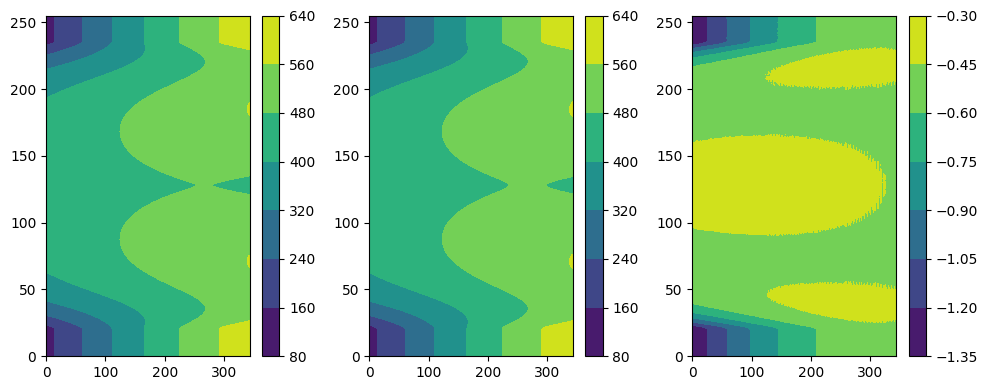

In [50]:
# let's get the jacobian matrices generate by the igor code
# and compare it to the one obtained by calculate_matrix_correction

# Jacobian
jname= [i for i in igordatapath_content if "Jacobian" in i ][0]
with open(os.path.join(igordatapath,jname) ) as file:
    jacobian_reference = np.loadtxt(file, delimiter='\t').T

print("The shape of the jacobian_reference is: ",jacobian_reference.shape)
#plt.xlim(120,150)
#plt.ylim(150,200)


(ek_axis,
    angle_axis,
    angular_correction_matrix,
    e_correction,
    jacobian_determinant,
) = calculate_matrix_correction(
    lens_mode,
    kinetic_energy,
    pass_energy,
    work_function,
    binning,
    config_dict,
)


print("The shape of the jacobian_determinant is: ",jacobian_determinant.shape)

delta_jacobian=jacobian_determinant-jacobian_reference

fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(10, 4))
subplot1=ax1.contourf(jacobian_determinant)
subplot2=ax2.contourf(jacobian_reference)
subplot3=ax3.contourf(delta_jacobian)
fig.colorbar(subplot1, ax=ax1)
fig.colorbar(subplot2, ax=ax2)
fig.colorbar(subplot3, ax=ax3)

plt.tight_layout()


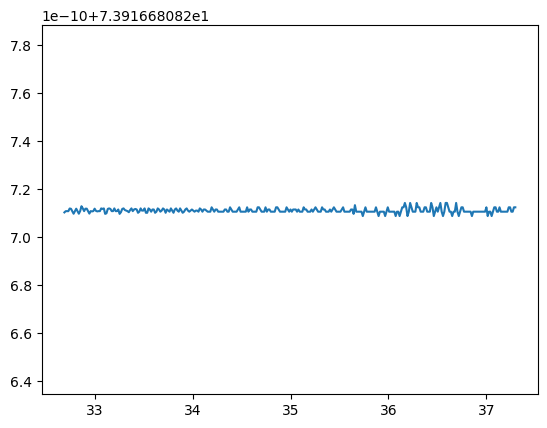

In [51]:
#plt.plot(ek_axis,e_correction)
d_ecorrection=np.gradient(e_correction,ek_axis)
plt.plot(ek_axis,d_ecorrection)

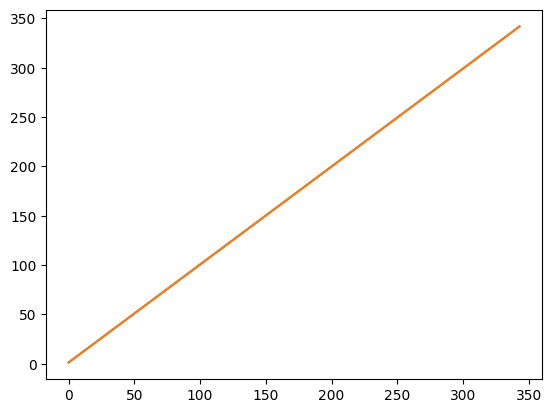

In [52]:
# e_correction
jname= [i for i in igordatapath_content if "E_Correction" in i ][0]
jname
with open(os.path.join(igordatapath,jname) ) as file:
    e_correction_reference = np.loadtxt(file, delimiter='\t')

plt.plot(e_correction)
plt.plot(e_correction_reference)

# ecorrection is different!!


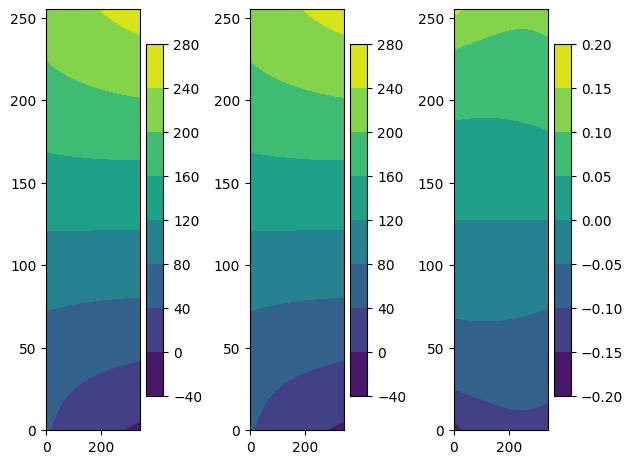

In [53]:
# e_correction
jname= [i for i in igordatapath_content if "Angular_Correction" in i ][0]
jname
with open(os.path.join(igordatapath,jname) ) as file:
    angle_correction_reference = np.loadtxt(file, delimiter='\t').T

delta_angle=(angle_correction_reference-angular_correction_matrix)

fig, (ax1,ax2,ax3) = plt.subplots(1,3)
subplot1=ax1.contourf(angular_correction_matrix)
subplot2=ax2.contourf(angle_correction_reference)
subplot3=ax3.contourf(delta_angle)
fig.colorbar(subplot1, ax=ax1)
fig.colorbar(subplot2, ax=ax2)
fig.colorbar(subplot3, ax=ax3)
plt.tight_layout()


In [54]:
config_dict=spa.config
config_dict.keys()

dict_keys(['calib2d_file', 'nx_pixel', 'ny_pixel', 'pixel_size', 'magnification', 'Ang_Offset_px', 'E_Offset_px', 'apply_fft_filter', 'crop', 'work_function', 'fft_filter_peaks', 'binning', 'calib2d_dict'])

In [55]:
config_dict['calib2d_dict']["WideAngleMode"]

{'rr': {0.1: {'aInner': 14.0,
   'Da1': [0.5102, 0.5761, 0.42],
   'Da3': [-0.02352, 0.0723, 0.2424],
   'Da5': [0.02391, -0.006087, -0.01908],
   'Da7': [-0.01339, -0.001605, -0.005363]},
  0.2: {'aInner': 15.0,
   'Da1': [0.5839, 0.6494, 0.6104],
   'Da3': [-0.01569, 0.05095, 0.1621],
   'Da5': [0.01359, -0.01416, -0.04377],
   'Da7': [-0.008422, -0.0001879, 0.00284]},
  0.3: {'aInner': 15.0,
   'Da1': [0.6459, 0.7183, 0.7196],
   'Da3': [-0.0278, 0.03312, 0.1291],
   'Da5': [0.01291, -0.01964, -0.05822],
   'Da7': [-0.008267, 0.001243, 0.007881]},
  0.35: {'aInner': 15.0,
   'Da1': [0.6674, 0.7306, 0.7326],
   'Da3': [-0.02429, 0.03752, 0.133],
   'Da5': [0.009284, -0.02501, -0.0667],
   'Da7': [-0.006816, 0.002873, 0.01045]},
  0.42: {'aInner': 15.0,
   'Da1': [0.6697, 0.7217, 0.7196],
   'Da3': [-0.02665, 0.03711, 0.1309],
   'Da5': [0.008432, -0.02877, -0.07389],
   'Da7': [-0.006662, 0.004071, 0.01335]},
  0.5: {'aInner': 15.0,
   'Da1': [0.6991, 0.7439, 0.7434],
   'Da3': [-0.0